array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccf4a07ac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fccf18ddeb8>]], dtype=object)

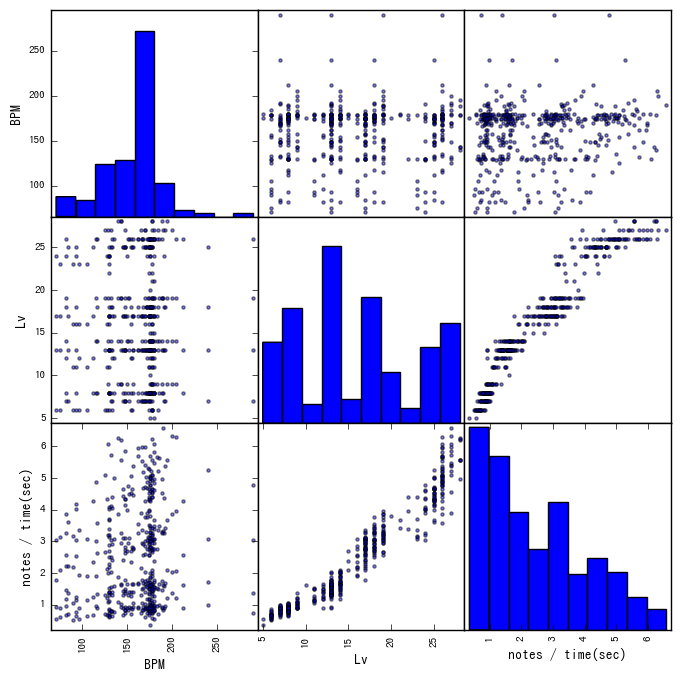

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
from scipy.cluster.hierarchy import linkage, dendrogram

pd.set_option("display.max_rows", 501)

# csvからデータの読み込み
df_1 = pd.read_csv('./data/deresute_music.csv')

# ノーツの密度を計算しdf_1に列追加
df_1['notes / time(sec)'] = df_1['notes'] / df_1['time(sec)'] 

# 散布図行列を書く
pd.tools.plotting.scatter_matrix(df_1.drop("title", axis=1).drop("time(sec)", axis=1).drop("notes", axis=1), figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccf4aba128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fccf48d6208>]], dtype=object)

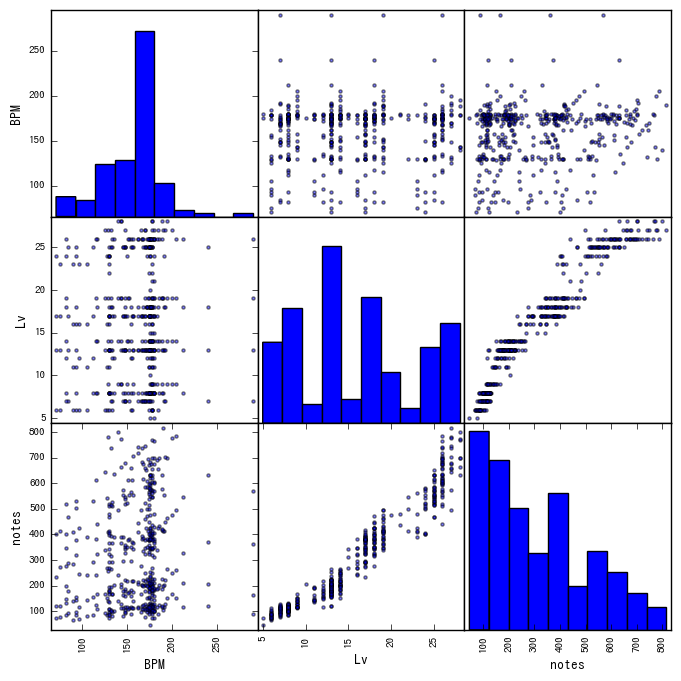

In [2]:
pd.tools.plotting.scatter_matrix(df_1.drop("title", axis=1).drop("time(sec)", axis=1).drop("notes / time(sec)", axis=1), figsize=(8,8))

In [3]:
# Lvの割にノーツが高いものを調べる
df_1['notes / Lv'] = df_1['notes'] / df_1['Lv'] 
df_1.sort_values(by='notes / Lv', ascending=False) 

,title,BPM,Lv,notes,time(sec),notes / time(sec),notes / Lv
381,あんきら！？狂騒曲_MASTER,205,26,785,125,6.280000,30.192308
419,共鳴世界の存在論_MASTER,190,27,815,124,6.572581,30.185185
374,エンジェル ドリーム_MASTER,180,26,765,126,6.071429,29.423077
413,Hotel Moonside_MASTER,129,27,779,128,6.085938,28.851852
452,絶対特権主張しますっ！_MASTER,200,27,777,123,6.317073,28.777778
455,モーレツ★世直しギルティ！_MASTER,162,26,743,125,5.944000,28.576923
437,TOKIMEKIエスカレート_MASTER,140,28,800,128,6.250000,28.571429
378,Nothing but You_MASTER,167,26,737,133,5.541353,28.346154
390,メルヘンデビュー！_MASTER,170,27,747,125,5.976000,27.666667
450,Orange Sapphire_MASTER,162,26,719,126,5.706349,27.653846


In [8]:
df_1[df_1['Lv'] <= 25].sort_values(by='notes', ascending=False) 

,title,BPM,Lv,notes,time(sec),notes / time(sec),notes / Lv
354,純情Midnight伝説_MASTER,171,25,651,129,5.046512,26.040000
448,Flip Flop_MASTER,240,25,631,120,5.258333,25.240000
451,ゴキゲンParty Night(Passion)_MASTER,175,25,630,126,5.000000,25.200000
428,ゴキゲンParty Night(Cool)_MASTER,175,25,630,126,5.000000,25.200000
443,Can't Stop!!_MASTER,168,25,618,132,4.681818,24.720000
406,Never say never_MASTER,156,25,611,131,4.664122,24.440000
393,恋色エナジー_MASTER,178,25,606,130,4.661538,24.240000
395,恋のHamburg♪_MASTER,170,25,586,124,4.725806,23.440000
344,輝く世界の魔法_MASTER,172,25,585,125,4.680000,23.400000
454,Near to You(Passion)_MASTER,174,25,582,129,4.511628,23.280000


In [5]:
df_1.sort_values(by='notes / time(sec)', ascending=False) 

,title,BPM,Lv,notes,time(sec),notes / time(sec),notes / Lv
419,共鳴世界の存在論_MASTER,190,27,815,124,6.572581,30.185185
452,絶対特権主張しますっ！_MASTER,200,27,777,123,6.317073,28.777778
381,あんきら！？狂騒曲_MASTER,205,26,785,125,6.280000,30.192308
437,TOKIMEKIエスカレート_MASTER,140,28,800,128,6.250000,28.571429
369,M@GIC☆_MASTER,178,28,767,123,6.235772,27.392857
392,秘密のトワレ_MASTER,143,28,773,125,6.184000,27.607143
413,Hotel Moonside_MASTER,129,27,779,128,6.085938,28.851852
374,エンジェル ドリーム_MASTER,180,26,765,126,6.071429,29.423077
350,Snow Wings_MASTER,167,26,682,114,5.982456,26.230769
390,メルヘンデビュー！_MASTER,170,27,747,125,5.976000,27.666667


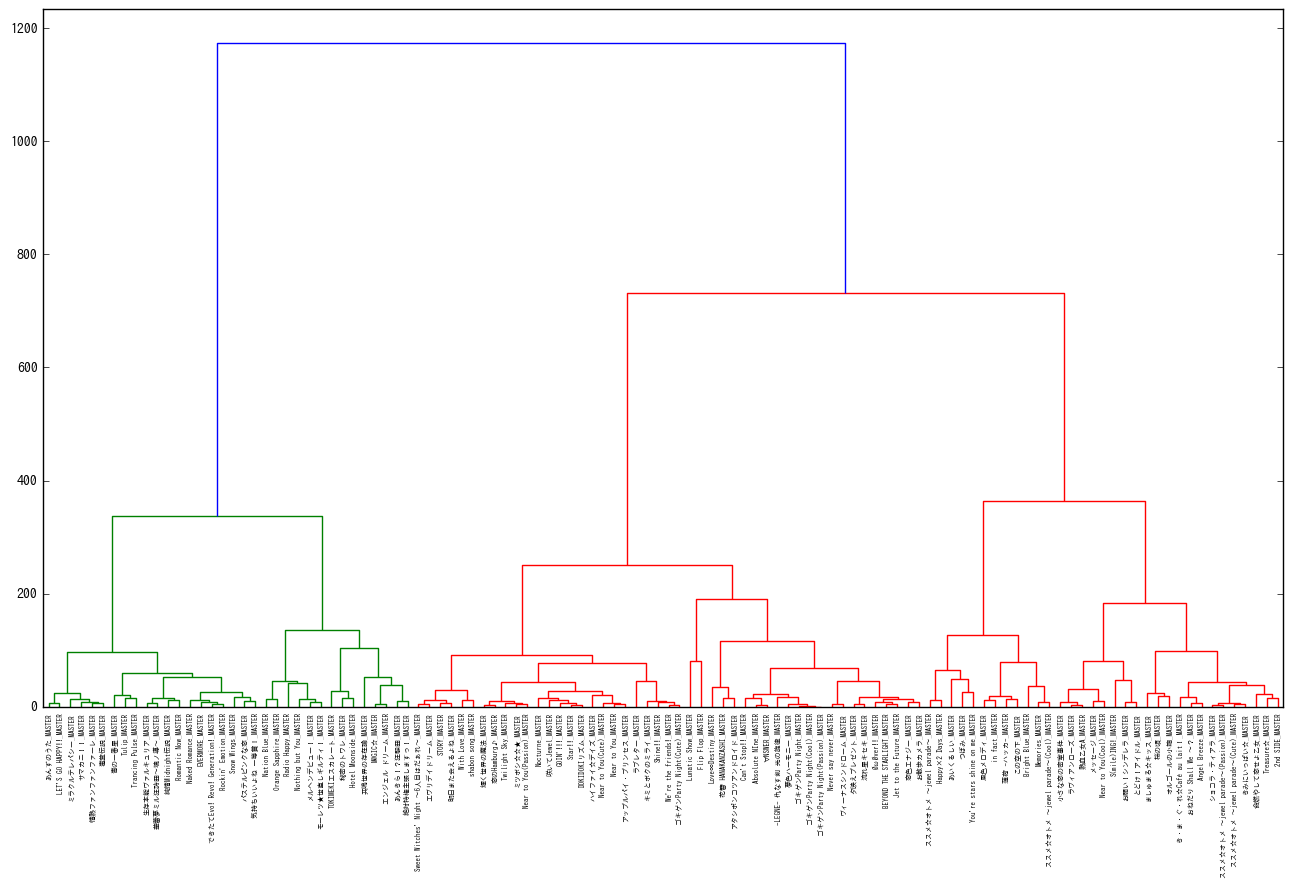

[43, 105, 103, 14, 90, 100, 75, 9, 81, 11, 66, 12, 94, 45, 7, 22, 97, 8, 60, 102, 85, 108, 104, 36, 48, 113, 95, 50, 71, 77, 27, 32, 39, 110, 17, 46, 28, 61, 37, 56, 2, 53, 65, 91, 112, 83, 88, 23, 20, 92, 10, 62, 35, 96, 38, 30, 24, 3, 59, 82, 106, 13, 47, 58, 101, 5, 19, 79, 25, 34, 86, 109, 64, 67, 21, 26, 55, 15, 63, 51, 98, 33, 54, 29, 6, 68, 42, 76, 73, 80, 70, 78, 84, 74, 52, 99, 4, 89, 40, 0, 1, 93, 18, 87, 49, 41, 69, 44, 107, 57, 111, 16, 31, 72]


In [71]:
# csvからデータの読み込み
df_2 = pd.read_csv('./data/deresute_music.csv')
df_2_master = df_2[df_2['Lv'] > 19]

#name = np.array(df_2['title'].values.flatten())
name = df_2_master['title'].values.tolist()
value = df_2_master.drop("title", axis=1).drop("Lv", axis=1).values.tolist()

result = linkage(value, method='ward')

plt.figure(figsize=(16,9))
#dendrogram(result, truncate_mode='lastp', labels=name)
r = dendrogram(result ,p=150, truncate_mode='lastp', labels=name)
plt.show()

print(r["leaves"])